# Project Prediction of heart disease

The goal of this project is to apply and compare different machine learning models to classify if an individual will have a heart disease or not.

### Data description

    1. age: age of the person in years 
    2. sex: gender of the person (1 = male, 0 = female)
    3. cp: chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) ## anders herum?!
    4. trestbps: resting blood pressure 
    5. chol: serum cholestoral in mg/dl
    6. fbs: fasting blood sugar ( if > 120 mg/dl, then 1 = True. Else 0 = False)
    7. restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
    8. thalach: maximum heart rate achieved
    9. exang: exercise induced angina (1 = True, 0 = False)
    10. oldpeak: ST depression induced by exercise relative to rest
    11. slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
    12. ca: number of major vessels (0-3) colored by flourosopy
    13. thal: blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) (1,2,3?! komplett falsch)
    14. target: heart disease (1 = True, 0 = False)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline
plt.style.use('ggplot')

# Informations about the data

In [2]:
#Read the data
df = pd.read_csv('heart.csv',na_values='?')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
for column in df:
    for zahl in df[column]:
        if type(zahl) != int and type(zahl) != float:
            print("Error")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
df_none = df.isna().sum()
print(df_none)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

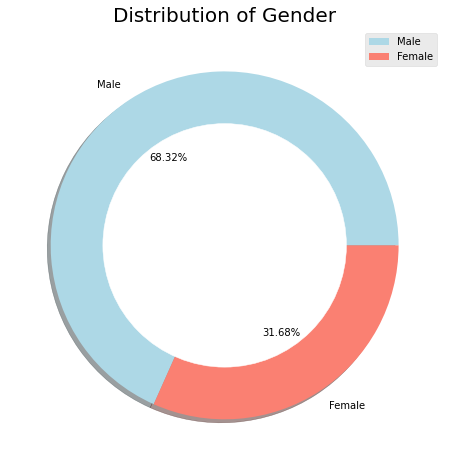

In [7]:
m = len(df[df.sex == 1])
f = len(df[df.sex == 0])

#Plot disribution of genders overall
size = [m, f] 
colors = ['lightblue', 'salmon']
labels = "Male", "Female"
#explode = [0, 0.01] #checke nicht wofür das gut sein soll

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
#plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

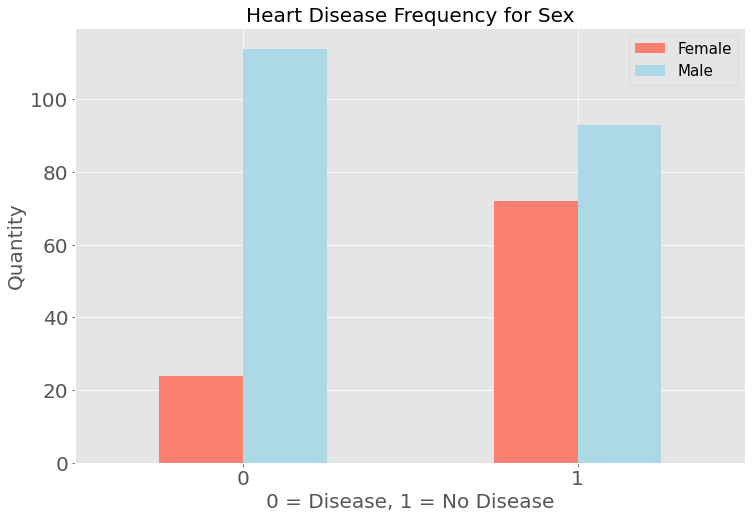

In [8]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(12,8), color=["salmon", "lightblue"],fontsize=20)

plt.title("Heart Disease Frequency for Sex",fontsize=20)
plt.xlabel("0 = Disease, 1 = No Disease",fontsize=20)
plt.ylabel("Quantity",fontsize=20)
plt.legend(["Female", "Male"],fontsize=15)
plt.xticks(rotation=0);

#komplett geklaut aber schon eine coole Darstellung so

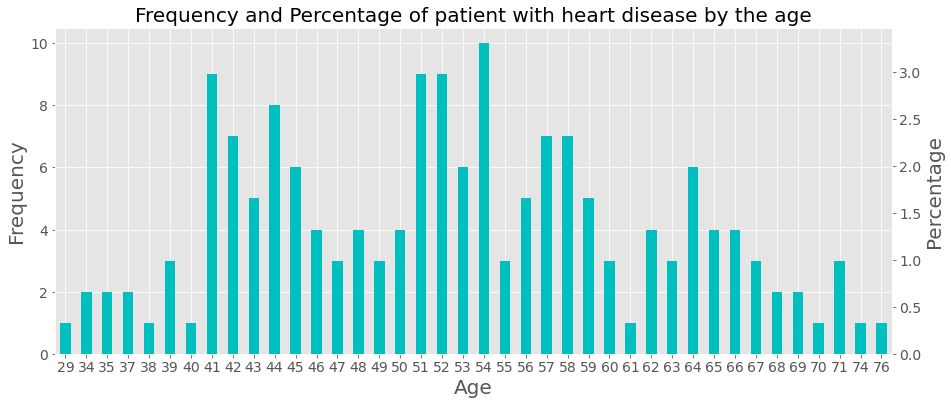

In [41]:
#Plot the frequency of patients with heart disease
ax = df[df['target'] == 1]['age'].value_counts().sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    rot=0,
    color='c')
ax.set_title("Frequency and Percentage of patient with heart disease by the age", fontsize=20)
ax.set_xlabel("Age", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

ax2 = ax.twinx()

#Plot the bar chart of the percentage of patient with heart disease
ax2 = ((df[df['target'] == 1]['age'].value_counts() / len(df)) * 100).sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    rot=0,
    color='c')
ax2.set_ylabel("Percentage", fontsize=20)
plt.grid()

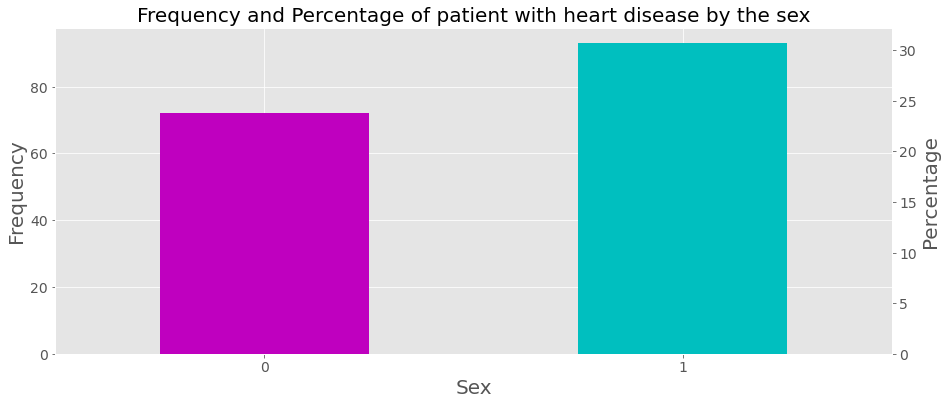

In [10]:
#Plot the frequency of patients with heart disease by the sex
ax = df[df['target'] == 1]['sex'].value_counts().sort_index().plot.bar(
    figsize=(10, 6),
    fontsize= 14,
    rot=0,
    color=['m','c'])
ax.set_title("Frequency and Percentage of patient with heart disease by the sex", fontsize=20)
ax.set_xlabel("Sex", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

ax2 = ax.twinx()

#Plot the bar chart of the percentage of patient with heart disease
ax2 = ((df[df['target'] == 1]['sex'].value_counts() / len(df)) * 100).sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    rot=0,
    color=['m','c'])
ax2.set_ylabel("Percentage", fontsize=20)
plt.grid()

Patient without heart disease:138
Patient with heart disease:165

Patient without heart disease:46.0%
Patient with heart disease:54.0%


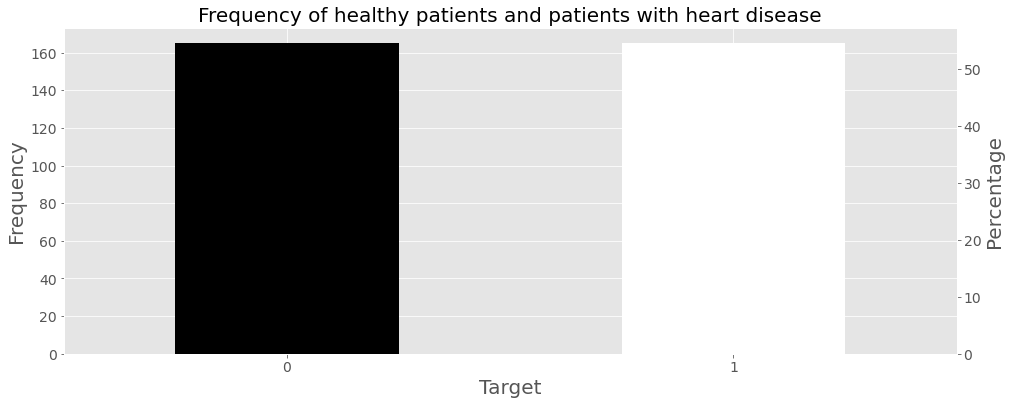

In [11]:
#Plot the frequency of patients with heart disease by the sex
ax = df['target'].value_counts().plot.bar(
    figsize=(16, 6),
    fontsize= 14,
    rot=0,
    color=['k','w'])
ax.set_title("Frequency of healthy patients and patients with heart disease", fontsize=20)
ax.set_xlabel("Target", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

ax2 = ax.twinx()

#Plot the bar chart of the percentage of patient with heart disease
ax2 = ((df['target'].value_counts() / len(df)) * 100).sort_index().plot.bar(
    figsize=(16, 6),
    fontsize= 14,
    rot=0,
    color=['k','w'])
ax2.set_ylabel("Percentage", fontsize=20)

plt.grid()
print('Patient without heart disease:{}\nPatient with heart disease:{}'.format(round(df['target'].value_counts()[0]),
                                         round(df['target'].value_counts()[1])))
print('\nPatient without heart disease:{}%\nPatient with heart disease:{}%'.format(round(df['target'].value_counts(normalize=True)[0],2)*100,
                                           round(df['target'].value_counts(normalize=True)[1],2)*100))

Patient without heart disease:138
Patient with heart disease:165

Patient without heart disease:46.0%
Patient with heart disease:54.0%


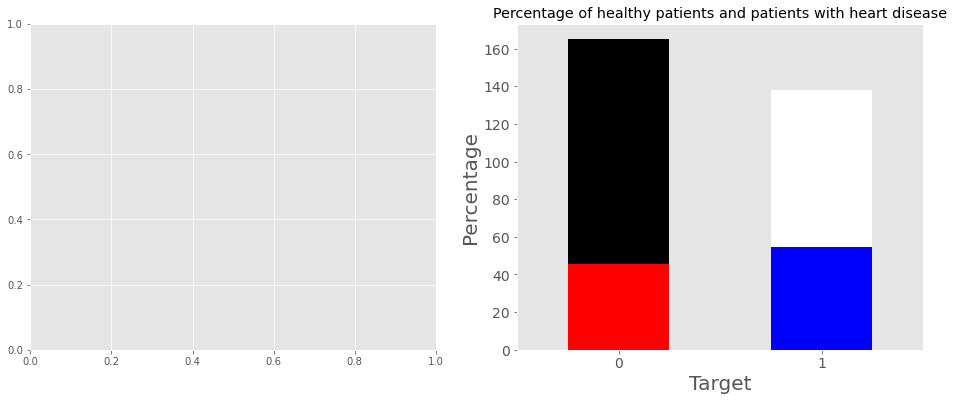

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

#Plot the frequency of patients with heart disease 
ax1 = df['target'].value_counts().plot.bar(
    fontsize= 14,
    rot=0,
    color=['k','w']);
ax1.set_title("Frequency of healthy patients and patients with heart disease", fontsize=20);
ax1.set_xlabel("Target", fontsize=20);
ax1.set_ylabel("Frequency", fontsize=20);

#Plot the bar chart of the percentage of patient with heart disease
ax2 = ((df['target'].value_counts() / len(df)) * 100).sort_index().plot.bar(
    fontsize= 14,
    rot=0,
    color=['r','b']);
ax2.set_title("Percentage of healthy patients and patients with heart disease")
ax2.set_xlabel("Target", fontsize=20);
ax2.set_ylabel("Percentage", fontsize=20);

plt.grid()
print('Patient without heart disease:{}\nPatient with heart disease:{}'.format(round(df['target'].value_counts()[0]),
                                         round(df['target'].value_counts()[1])))
print('\nPatient without heart disease:{}%\nPatient with heart disease:{}%'.format(round(df['target'].value_counts(normalize=True)[0],2)*100,
                                           round(df['target'].value_counts(normalize=True)[1],2)*100))

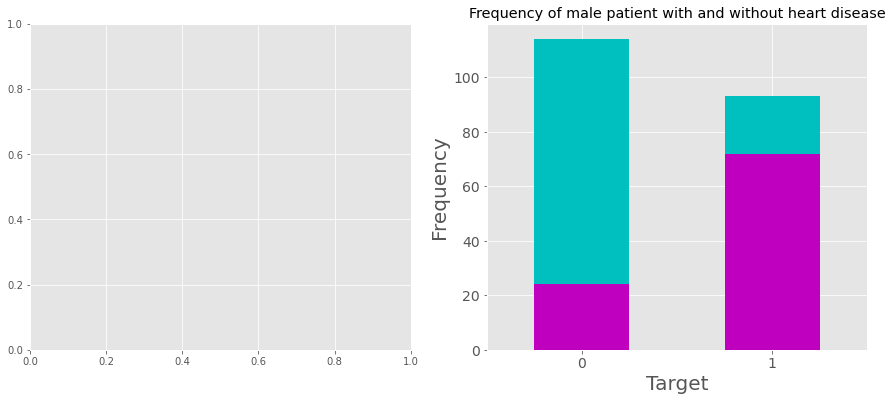

In [13]:
#Wie viele männer unter sich heart desease haben häufigkeit
#wie viele frauen unter sich heart desease haben häufigkeit

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
#Plot the frequency of patients with heart disease
ax1 = df['target'][df['sex'] == 1].value_counts().sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    rot=0,
    color='c')
ax1.set_title("Frequency of male patient with and without heart disease", fontsize=20)
ax1.set_xlabel("Target", fontsize=20)
ax1.set_ylabel("Frequency", fontsize=20)


#Plot the bar chart of the percentage of patient with heart disease
ax2 = df['target'][df['sex'] == 0].value_counts().sort_index().plot.bar(
    fontsize= 14,
    rot=0,
    color='m');
ax2.set_title("Frequency of male patient with and without heart disease")
ax2.set_xlabel("Target", fontsize=20);
ax2.set_ylabel("Frequency", fontsize=20);

## Correlation Matrix

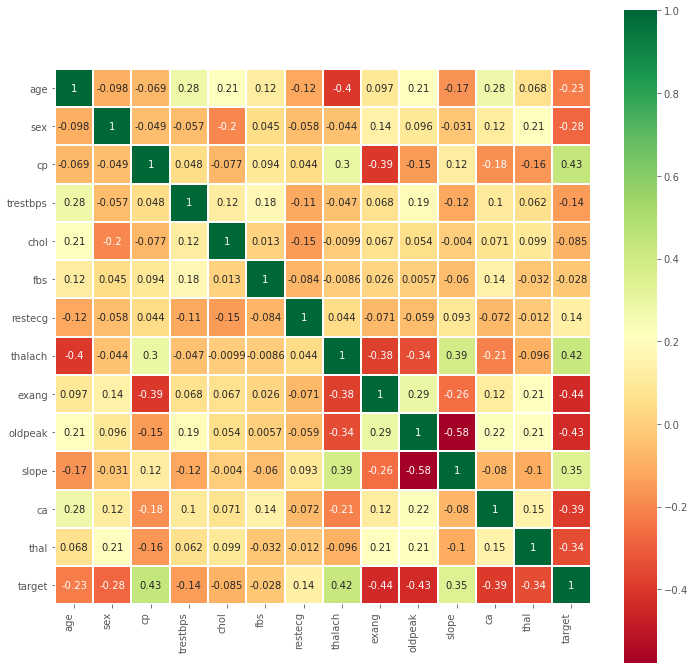

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
h = sns.heatmap(corr, cmap=plt.cm.RdYlGn, annot=True, linewidths=1, square=True, ax=ax)
ax.set_ylim(len(corr),0) 
h.set_xticklabels(h.get_xticklabels(), rotation=90, ha='right')
h.set_yticklabels(h.get_yticklabels(), rotation=0, ha='right');

In [15]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

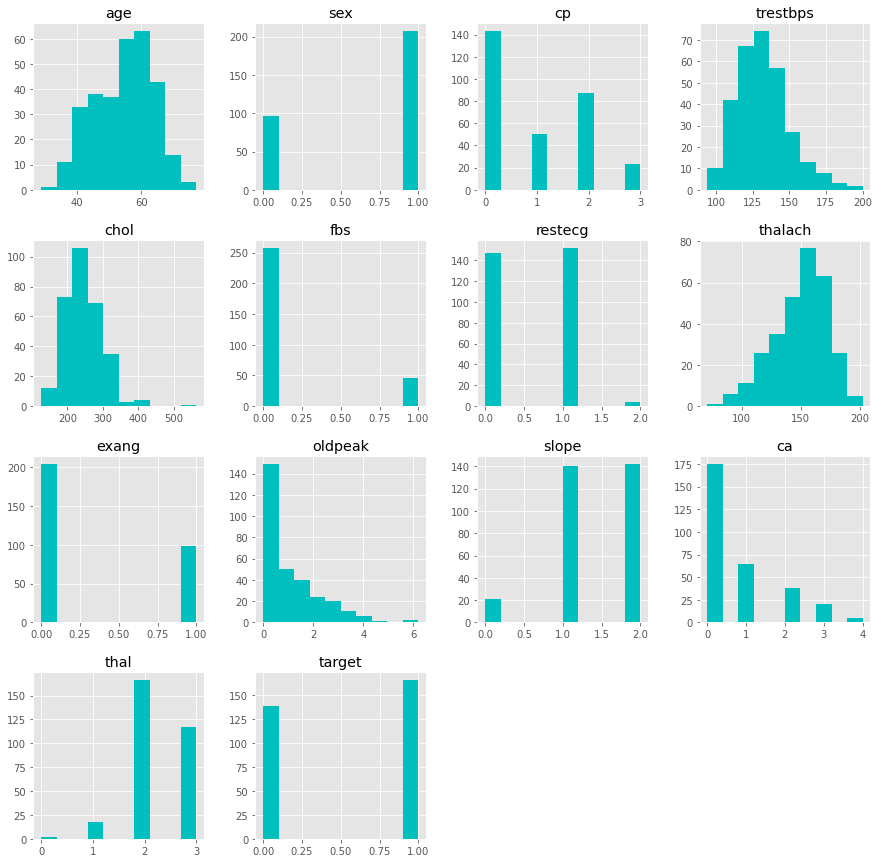

In [16]:
df.hist(figsize=(15,15), color = 'c')

In [17]:
#sns.pairplot(df, kind='reg')

# Preprocess

# (it may be necessary to apply some techniques to enlarge this dataset)

Das steht so in der PDF Datei von Projektauswahl bei unserem Thema

In [18]:
# Übung 5 hat Alina bei den Daten das hier gemacht, aber es gab dann auch zwischen League usw nur 2 zur Auswahl, 
# also 0 oder 1 in der Spalte und trotzdem hat die das hier durchgeführt. Bin mir nicht sicher wofür und ob wir das
# dann machen sollten

# hitters = pd.read_csv('../Data/Hitters.csv', index_col=0).dropna()
# dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])
# hitters = hitters.drop(['League', 'Division', 'NewLeague'], axis=1)
# hitters = pd.concat([hitters, dummies[['League_N', 'Division_W', 'NewLeague_N']]],axis=1)
# hitters.head()


In [19]:
# Einer bei github hat mit unseren Daten folgendes gemacht:

#divide the data to target and features
X = df.drop(['target'], axis=1)
y = df.target

#Encode the catergorical data in the features data
X_encoded = pd.get_dummies(df, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

# Warum dann aber auch nicht target? Ist ja auch quasi 1 und 0 wie die anderen und sollten dummy Variablen sein?
# Checke halt den Sinn davon nicht

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Spliting the data set to trainset (80%) and test set (20%)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

# Classification Algorithms

## Supervised

### 1. Logistic Regression 

In [21]:
#Create Logistic regression model and train the model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
# log_Reg = LogisticRegression(random_state = 1)
# log_Reg.fit(X_train,y_train)
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())

         Current function value: 0.000006
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                           23
Date:                Tue, 08 Jun 2021   Pseudo R-squ.:                   1.000
Time:                        20:17:18   Log-Likelihood:             -0.0014934
converged:                      False   LL-Null:                       -166.34
Covariance Type:            nonrobust   LLR p-value:                 1.077e-56
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0163     66.865     -0.000      1.000    -131.069     131.036
trestbps      -0.0726     47.520     -0.002      0.999     -93.21

C:\Users\vlada\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 2. Linear discriminant analysis

### 3. Quadratic discriminant analysis

### 4. K-nearest neighbor

### 5. Support vector machines

### 6. Decision trees

# Taras code

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from tabulate import tabulate
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv("heart.csv")  # storing the data in df
df.index.rename("id", inplace=True)
df.drop_duplicates(inplace=True)  # droping dublicates
pd.options.display.width = None  # for fully display the columns in PyCharm

df_hd = df[df["target"] == 1]  # dataframe of Heart diseases
df_whd = df[df["target"] == 0]  # dataframe of Without Heart diseases

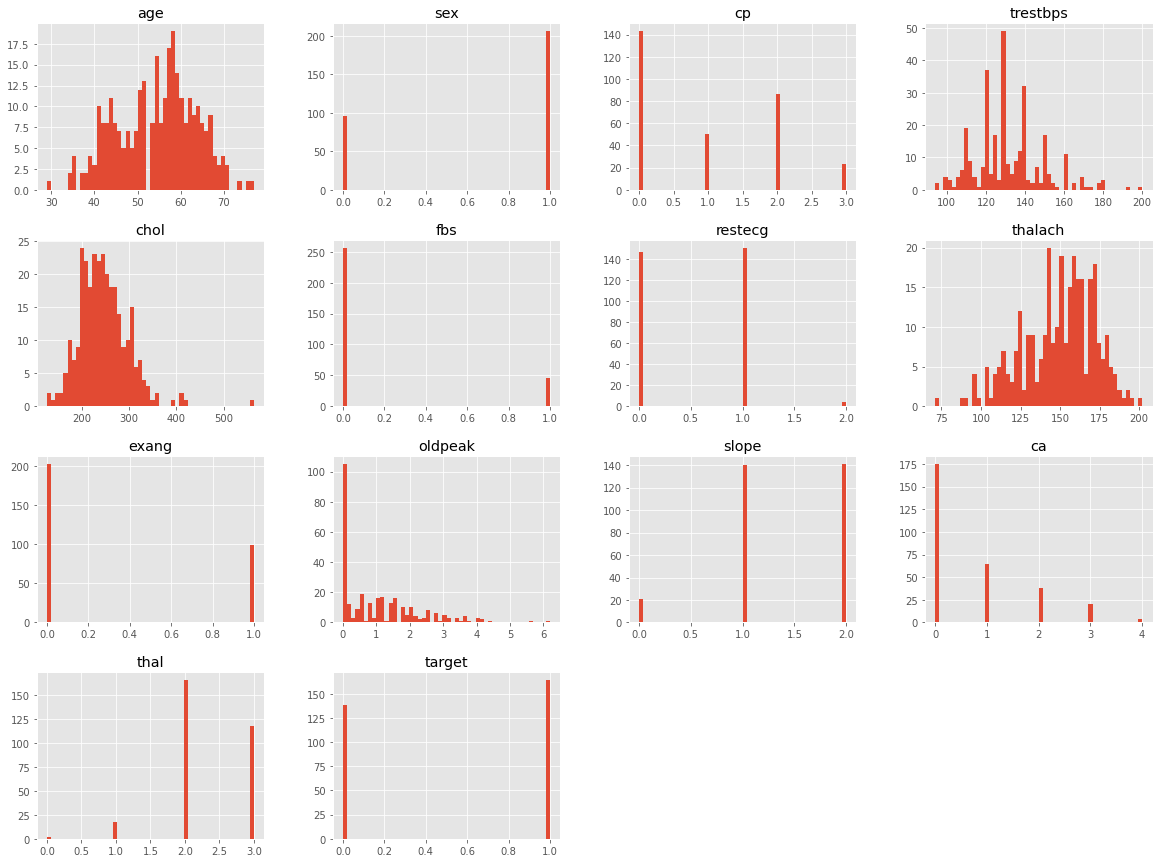

In [29]:
#def infos():  # plotting all the data in histograms (maybe change the column names?)

df.hist(bins=50, figsize=(20, 15))
plt.show()

In [30]:
#def des_stat():  # generating descriptive statistics

df_des = df.describe()
print(tabulate(df_des, headers="firstrow")) #Tabulate funktionert nicht kp

NameError: name 'tabulate' is not defined

In [33]:
#def check_none():  # checking if there are any "None" values in the dataset

df_none = df.isna().sum()
print(df_none)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


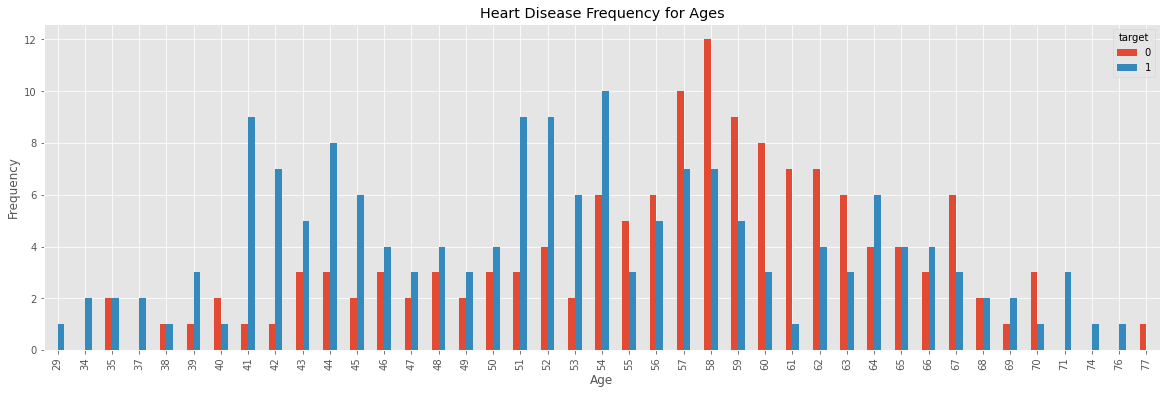

In [35]:
#def hd_age_plot():

df = df_hd.append(df_whd)
pd.crosstab(df["age"], df["target"]).plot(kind="bar", figsize=(20, 6))
pyplot.title("Heart Disease Frequency for Ages")
pyplot.xlabel("Age")
pyplot.ylabel("Frequency")
pyplot.show()

In [37]:
#def data_preprocess():
    # Due to the description of the features, some of them are categorical not numbers
heart_data = df
heart_data['sex'] = heart_data['sex'].astype('object')
heart_data['cp'] = heart_data['cp'].astype('object')
heart_data['fbs'] = heart_data['fbs'].astype('object')
heart_data['restecg'] = heart_data['restecg'].astype('object')
heart_data['exang'] = heart_data['exang'].astype('object')
heart_data['slope'] = heart_data['slope'].astype('object')
heart_data['thal'] = heart_data['thal'].astype('object')

heart_data = pd.get_dummies(heart_data, drop_first=True)